## The Timeless Timing Argument

This script produces the plots in the paper "The Timeless Timing Argument", along with a few extra plots.

You are free to use any part of this script. If you use any of it in your own scientific work, we would appreciate a citation to our paper, by Sawala, Penarrubia, Liao and Johansson.

The data to be plotted is computed in "prepare_data.ipynb"

For any questions, please email: till.sawala@helsinki.fi, or contact me via github.

# Table of Contents.  <a id='Contents'></a>

## Preliminaries

- ### Define [local paths](#paths) and [import](#imports) modules.
- ### Set [parameters](#parameters).
- ### Read the list of Uchuu [scalefactors](#scalefactors).
- ###  Read the [orbit data](#readorbits) from file, and identify subsets.
- ###  Read the [spherical density](#readdensity) from file.

## Plots

- ### Plot [evolution of enclosed masses](#evolution_sphere).
- ### Plot [evolution of $M_r / M_{TA}$ and $M_{200} / M_{TA}$](#evolution_ratio).
- ### Plot [average evolution](#evolution).
- ### Plot [distributions at $z=0$](#distributions).
- ### Plot [correlations](#scatter) between mass estimators at different redshifts.


### Define path for local modules  <a id='paths'></a>  (back to [Contents](#Contents))

This will depend on your particular environment and will not be necessary if you have all packages that are imported below in your standard python path.

In [14]:
import sys
print(sys.path)

# This is necessary for loading modules on the Puhti computer at CSC.
sys.path.append('/users/sawalati/.local/lib/python3.10/site-packages')

print("now:", sys.path)


['/users/sawalati', '/CSC_CONTAINER/miniconda/envs/env1/lib/python310.zip', '/CSC_CONTAINER/miniconda/envs/env1/lib/python3.10', '/CSC_CONTAINER/miniconda/envs/env1/lib/python3.10/lib-dynload', '', '/CSC_CONTAINER/miniconda/envs/env1/lib/python3.10/site-packages', '/CSC_CONTAINER/miniconda/envs/env1/lib/python3.10/site-packages/IPython/extensions', '/users/sawalati/.ipython', '/users/sawalati/.local/lib/python3.10/site-packages']
now: ['/users/sawalati', '/CSC_CONTAINER/miniconda/envs/env1/lib/python310.zip', '/CSC_CONTAINER/miniconda/envs/env1/lib/python3.10', '/CSC_CONTAINER/miniconda/envs/env1/lib/python3.10/lib-dynload', '', '/CSC_CONTAINER/miniconda/envs/env1/lib/python3.10/site-packages', '/CSC_CONTAINER/miniconda/envs/env1/lib/python3.10/site-packages/IPython/extensions', '/users/sawalati/.ipython', '/users/sawalati/.local/lib/python3.10/site-packages', '/users/sawalati/.local/lib/python3.10/site-packages']


### Import local modules <a id='imports'></a>  (back to [Contents](#Contents))

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import ScalarFormatter

import scipy.stats as stats
from scipy.stats import gaussian_kde

import numpy as np
import math
import os
import pickle

from astropy import units as u
from astropy.cosmology import FlatLambdaCDM
from astropy.cosmology import z_at_value

print ("loaded modules")

loaded modules


### Set Paramters <a id='parameters'></a>  (back to [Contents](#Contents))

In [16]:
cosmo = FlatLambdaCDM(H0=67.74, Om0=0.3, Tcmb0=2.725)

hubble = .6774

colormap = cm.plasma # color map for sequences

# selection criteria:

max_massratio = 5

r_min_strict = .77 - .15
r_max_strict = .77 + .15
vr_min_strict = -110 - 30
vr_max_strict = -110 + 30
vt_max_strict = 60

r_min_broad = .77 - .3
r_max_broad = .77 + .3
vr_min_broad = -110 - 90
vr_max_broad = -110 + 90
vt_max_broad = 150

plot_directory = "figures"
os.makedirs(plot_directory,  exist_ok=True)

snapshots = np.array([50,45, 40,30,20,15,12])
particle_index = np.arange(0,len(snapshots))   # for indexing the particle data
tree_index = 50 - snapshots                    # for indexing the tree data

fine_index = np.arange(0,max(tree_index)+1)

print ("tree indices:", tree_index, "particle indices:", particle_index)
print ("fine index:", fine_index)

# ages to display
ages = np.array([13, 10, 8, 6, 5, 4, 3, 2, 1])*u.Gyr
ageticks = [1 / (1 + z_at_value(cosmo.age, age)) for age in ages]

# redshifts to display 
label_redshifts = np.array([4,3,2,1,0.5,0.2,0])
label_redshifts_str = ["4","3","2","1","0.5","0.2","0"]
label_scales = 1 / (label_redshifts + 1)

plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"


tree indices: [ 0  5 10 20 30 35 38] particle indices: [0 1 2 3 4 5 6]
fine index: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]


###  Read the list of Uchuu scalefactors  <a id='scalefactors'></a>  (back to [Contents](#Contents))

In [17]:
f = open('Uchuu_redshift_scalefactors.txt', 'r')

lines = f.readlines()
scale = []
                  
for line in lines:
    columns = line.split()
    scale.append(float(columns[2]))

scale = np.flip(scale)
print ("scalefactors:", scale)

scalefactors: [0.999887 0.977848 0.956412 0.914941 0.87523  0.837539 0.801034 0.766456
 0.733135 0.701575 0.671151 0.642035 0.614153 0.587537 0.562099 0.537713
 0.514356 0.49213  0.470773 0.450389 0.430727 0.412155 0.394333 0.377182
 0.360886 0.34528  0.330255 0.315864 0.30214  0.289175 0.276536 0.264684
 0.253086 0.242223 0.231799 0.216898 0.202878 0.189856 0.177649 0.162519
 0.148772 0.136158 0.124496 0.113967 0.104325 0.095413 0.087363 0.079949
 0.073131 0.066964]


###  Read the orbit data from file  <a id='readorbits'></a>  (back to [Contents](#Contents))

In [18]:
orbit_data_file = 'orbits_savgol.npz'

with np.load(orbit_data_file, allow_pickle=True) as calculationdata:
    list_M_TA = calculationdata['list_M_TA']
    list_a_TA = calculationdata['list_a_TA']
    list_e_TA = calculationdata['list_e_TA']
    list_eta_TA = calculationdata['list_eta_TA']
    list_solver_TA = calculationdata['list_solver_TA']
    list_r = calculationdata['list_r']
    list_vr = calculationdata['list_vr']
    list_vt = calculationdata['list_vt']
    list_M_MW = calculationdata['list_M_MW']
    list_M_M31 = calculationdata['list_M_M31']
    list_N_prog = calculationdata['list_N_prog']
    selection_orbits = calculationdata['selection']
    
print ("read orbit calculation data from file")

r_z0 = np.array([list_r[i][0] for i in range (len(list_r))])
vr_z0 = np.array([list_vr[i][0] for i in range (len(list_vr))])
vt_z0 = np.array([list_vt[i][0] for i in range (len(list_vt))])
M_MW_z0 = np.array([list_M_MW[i][0] for i in range (len(list_M_MW))])
M_M31_z0 = np.array([list_M_M31[i][0] for i in range (len(list_M_M31))])

# stricter criteria

criteria_r = np.where( (r_z0 > r_min_strict) & (r_z0 < r_max_strict) )[0]
criteria_vr = np.where( (vr_z0 > vr_min_strict) & (vr_z0 < vr_max_strict) )[0]
criteria_vt = np.where( (vt_z0 < vt_max_strict) )[0]

print ("len strict r:", len(criteria_r), " len vr:", len(criteria_vr), " len vt:", len(criteria_vt))

criteria_strict = list (set(criteria_r) & set(criteria_vr) & set(criteria_vt) )

print ("len strict criteria:", len(criteria_strict))

# looser criteria
criteria_r = np.where( (r_z0 > r_min_broad) & (r_z0 < r_max_broad) )[0]
criteria_vr = np.where( (vr_z0 > vr_min_broad) & (vr_z0 < vr_max_broad) )[0]
criteria_vt = np.where( (vt_z0 < vt_max_broad) )[0]

print ("len loose r:", len(criteria_r), " len vr:", len(criteria_vr), " len vt:", len(criteria_vt))

criteria_loose = list (set(criteria_r) & set(criteria_vr) & set(criteria_vt) )

print ("len loose criteria:", len(criteria_loose))

mask_loose = np.array(criteria_loose)
mask_strict = np.array(criteria_strict)

list_M_TA_s = list_M_TA[mask_strict]
list_a_TA_s = list_a_TA[mask_strict]
list_e_TA_s = list_e_TA[mask_strict]
list_eta_TA_s = list_eta_TA[mask_strict]
list_solver_TA_s = list_solver_TA[mask_strict]
list_r_s = list_r[mask_strict]
list_vr_s = list_vr[mask_strict]
list_vt_s = list_vt[mask_strict]
list_M_MW_s = list_M_MW[mask_strict]
list_M_M31_s = list_M_M31[mask_strict]
list_N_prog_s = list_N_prog[mask_strict]
selection_orbits_s = selection_orbits[mask_strict]

list_M_TA_l = list_M_TA[mask_loose]
list_a_TA_l = list_a_TA[mask_loose]
list_e_TA_l = list_e_TA[mask_loose]
list_eta_TA_l = list_eta_TA[mask_loose]
list_solver_TA_l = list_solver_TA[mask_loose]
list_r_l = list_r[mask_loose]
list_vr_l = list_vr[mask_loose]
list_vt_l = list_vt[mask_loose]
list_M_MW_l = list_M_MW[mask_loose]
list_M_M31_l = list_M_M31[mask_loose]
list_N_prog_l = list_N_prog[mask_loose]
selection_orbits_l = selection_orbits[mask_loose]

print ("finnished selecting")

N_LG_l = len(mask_loose)
N_LG_s = len(mask_strict)

read orbit calculation data from file
len strict r: 2959  len vr: 1748  len vt: 2266
len strict criteria: 425
len loose r: 4902  len vr: 4902  len vt: 4902
len loose criteria: 4902
finnished selecting


###  Read the spherical density data from file  <a id='readdensity'></a>  (back to [Contents](#Contents))

In [19]:
NSnapFiles = 400

LG_spheremass_com = []
LG_spheremass_kpc = []
LG_spheremass_r = []
selection_particledata = [] 

for i, snapshot in enumerate(snapshots):

    particle_data_file = 'MiniUchu_particledata_snap_'+str(snapshot)+'.npz'

    with np.load(particle_data_file,  allow_pickle=True) as particledata:
        shell_radii_kpc = particledata['shell_radii_kpc']
        shell_radii_r = particledata['shell_radii_r']
        LG_spheremass_com.append(particledata['LG_NP_com'] * 3.27 * 1e8 / hubble)
        LG_spheremass_kpc.append(particledata['LG_NP_kpc'] * 3.27 * 1e8 / hubble)
        LG_spheremass_r.append(particledata['LG_NP_r'] * 3.27 * 1e8 / hubble) 
        
    print ("len particledata", len(LG_spheremass_kpc[i]))
print ("read particle data from files")

len particledata 4902
len particledata 4902
len particledata 4902
len particledata 4902
len particledata 4902
len particledata 4902
len particledata 4902
read particle data from files


## Plots

### Plot evolution of masses enclosed in spheres.  <a id='evolution_sphere'></a> (_Figure 2_) (back to [Contents](#Contents))  (back to [Contents](#Contents))

####  Solid lines: broad set, subset of dashed lines: strict set

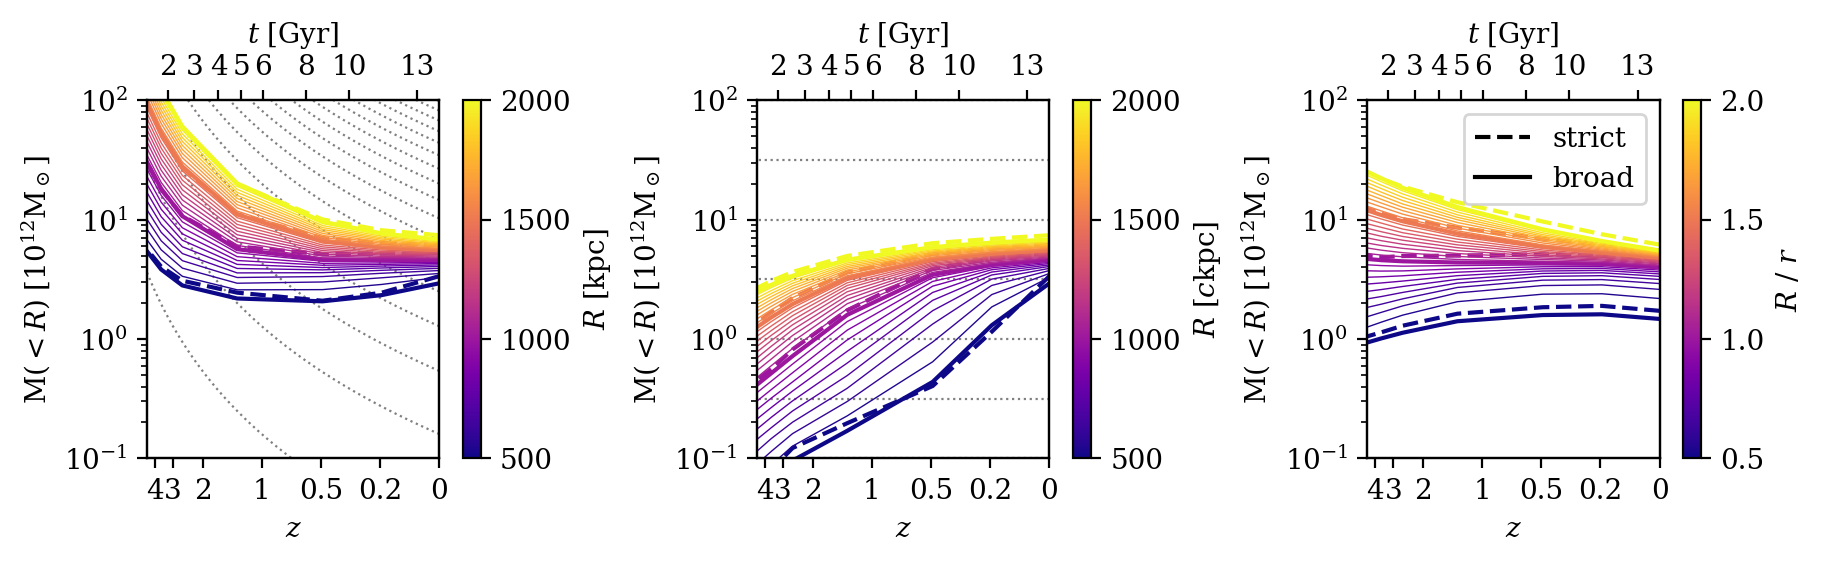

In [20]:
fig, ax = plt.subplots(figsize=(9,2.7), ncols=3, nrows=1, dpi=200, constrained_layout = True)

# fixed size [kpc]

normalize = mpl.colors.Normalize(vmin=shell_radii_kpc[8], vmax=np.max(shell_radii_kpc))

for i in range (8,39):  # loop over radius bin
    m_med_s = []
    m_med_l = []
    
    for idx, snapshot in enumerate(snapshots): # loop over snapshot
        
        m_med_s.append(np.percentile( LG_spheremass_kpc[idx][mask_strict,i] / 1.e12,50))
        m_med_l.append(np.percentile( LG_spheremass_kpc[idx][mask_loose,i] / 1.e12,50))

    if i in (8,18,28,38):
        lw = 1.5
        
        ax[0].plot(scale[tree_index], m_med_s, c = colormap(normalize(shell_radii_kpc[i])),
                   lw = lw, ls ='dashed' )
        
    else:
        lw = .5
    
    ax[0].plot(scale[tree_index], m_med_l, c = colormap(normalize(shell_radii_kpc[i])),
               lw = lw )
    
# overplot expansion of the universe:
for i in range (50):
    selection = np.where( i/10.*scale**-3 > -1.)
    ax[0].plot(scale[selection], i**3/50.*scale[selection]**-3, c = 'grey', ls = 'dotted', lw=.8, zorder=-1)
    
# color bar
sm = plt.cm.ScalarMappable(cmap=colormap, norm=normalize)
sm.set_array([])
plt.colorbar(sm, ticks=[500,1000,1500,2000], ax=ax[0], label = r'$R \ [\mathrm{kpc}]$')



# comoving spheres

for i in range (8,39):
    m_med_s = []
    m_med_l = []
    
    for idx, snapshot in enumerate(snapshots):
        
        m_med_s.append(np.percentile( LG_spheremass_com[idx][mask_strict,i] / 1.e12,50))
        m_med_l.append(np.percentile( LG_spheremass_com[idx][mask_loose,i] / 1.e12,50))

    if i in (8,18,28,38):
        lw = 1.5        
        ax[1].plot(scale[tree_index], m_med_s, c = colormap(normalize(shell_radii_kpc[i])),
                   lw = lw, ls ='dashed' )
        
    else:
        lw = .5
    
    ax[1].plot(scale[tree_index], m_med_l, c = colormap(normalize(shell_radii_kpc[i])), lw = lw )

# overplot expansion of the universe:
for i in range (20):
    ax[1].plot([0,1],[0.01*10**(i / 2), 0.01*10**(i / 2)], c = 'grey', ls = 'dotted', lw=.8, zorder=-1)
    
# color bar
sm = plt.cm.ScalarMappable(cmap=colormap, norm=normalize)
sm.set_array([])
plt.colorbar(sm, ticks=[500,1000,1500,2000], ax=ax[1], label = r'$R \  [c\mathrm{kpc}]$')


    
# multiple of separation, d

normalize = mpl.colors.Normalize(vmin=shell_radii_r[8], vmax=np.max(shell_radii_r))

for i in range (8,39):
    m_med_s = []
    m_med_l = []
    
    for idx, snapshot in enumerate(snapshots):
        
        m_med_s.append(np.percentile( LG_spheremass_r[idx][mask_strict,i] / 1.e12,50))
        m_med_l.append(np.percentile( LG_spheremass_r[idx][mask_loose,i] / 1.e12,50))

    if i in (8,18,28,38):
        lw = 1.5        
        ax[2].plot(scale[tree_index], m_med_s, c = colormap(normalize(shell_radii_r[i])),
                    lw = lw, ls ='dashed' )
        
    else:
        lw = .5
    
    ax[2].plot(scale[tree_index], m_med_l, c = colormap(normalize(shell_radii_r[i])), lw = lw )

# color bar
sm = plt.cm.ScalarMappable(cmap=colormap, norm=normalize)
sm.set_array([])
plt.colorbar(sm, ticks=[0.5,1.0,1.5,2.0], ax=ax[2], label = r'$R \ / \ r$')

# format and label axes
ax[0].set_ylabel(r'$\mathrm{M} (< R) \ [10^{12} \mathrm{M}_\odot]$')
ax[1].set_ylabel(r'$\mathrm{M} (< R) \ [10^{12} \mathrm{M}_\odot]$')
ax[2].set_ylabel(r'$\mathrm{M} (< R) \ [10^{12} \mathrm{M}_\odot]$')

for i in range (3):
    
    ax[i].set_yscale('log')
    ax[i].set_ylim(0.1, 100)
    
    ax[i].set_xticks(label_scales)
    ax[i].set_xticklabels(label_redshifts_str)
    
    ax[i].set_xlabel(r'$z$')
    ax2 = ax[i].twiny() # ax1 and ax2 share y-axis
    ax2.set_xlabel(r'$t\ \mathrm{[Gyr]}$')
    ax2.set_xticks(ageticks)
    ax2.set_xticklabels(['{:g}'.format(age) for age in ages.value])
    ax[i].set_xlim(scale[max(tree_index)],1)
    ax2.set_xlim(scale[max(tree_index)],1)

ax[2].plot([0,0],[1e-4,1e-4], ls='dashed', color='black', lw=1.5, label = 'strict')
ax[2].plot([0,0],[1e-4,1e-4], ls='solid', color='black', lw=1.5, label = 'broad')

ax[2].legend(loc='upper right')

plt.savefig(plot_directory+'/spherical_mass_evolution_absolute_snap'+str(snapshot)+'.pdf')  

### Plot evolution of $M_r / M_{TA}$ and $M_{200} / M_{TA}$.  (_Figure 3_)
### Broad set only. <a id='evolution_sphere'></a>  (back to [Contents](#Contents))

i 18 r: 1.0  x d
max ratio M(R): 1.329941561693068
min ratio M(R): 0.8839069932575365
max ratio M(200): 52.21225671421529


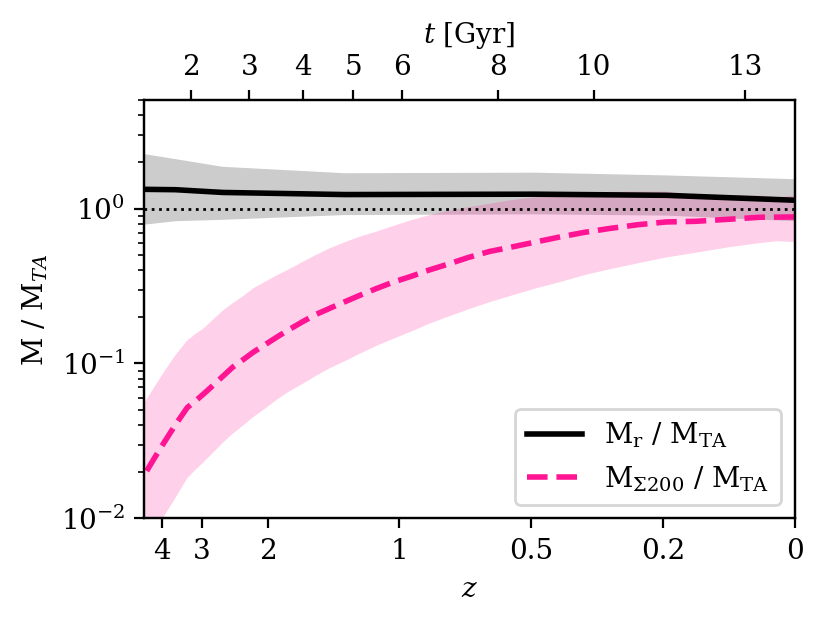

In [21]:
fig, ax = plt.subplots(figsize=(4.,3), ncols=1, nrows=1, dpi=200, constrained_layout = True)


# multiple of separation, d

normalize = mpl.colors.Normalize(vmin=shell_radii_r[8], vmax=np.max(shell_radii_r))

i = 18 # bin for which the multiple is equal to 1.
print ("i", i, "r:", str(np.round(shell_radii_r[i],4)), " x d" )

m_med = []
m_minus1 = []
m_plus1 = []

for idx, snapshot in enumerate(snapshots):

    M_TA = np.array([list_M_TA_l[i][idx] for i in range(N_LG_l)])

    m_med.append(np.percentile(LG_spheremass_r[idx][mask_loose,i] / M_TA ,50))
    m_minus1.append(np.percentile(LG_spheremass_r[idx][mask_loose,i] / M_TA,16))
    m_plus1.append(np.percentile(LG_spheremass_r[idx][mask_loose,i] / M_TA,84))

ax.fill_between(scale[tree_index], m_plus1, m_minus1, fc = 'black', alpha=.2)

ax.plot(scale[tree_index], m_med, c = 'black',
            ls='solid', lw=2, zorder=20, label = r'$\mathrm{M_{r} \ / \ M_{TA}}$')

print ("max ratio M(R):", max(m_med))
print ("min ratio M(R):", 1 / min(m_med))

# M200 

m_med = []
m_plus1 = []
m_minus1 = []

for idx, snap in enumerate(fine_index):
    
    M_MW = np.array([list_M_MW_l[i][idx] for i in range(N_LG_l)]) 
    M_M31 = np.array([list_M_M31_l[i][idx] for i in range(N_LG_l)]) 
    M_LG = M_MW + M_M31
    
    M_TA = np.array([list_M_TA_l[i][idx] for i in range(N_LG_l)])
    
    m_med.append(np.percentile(M_LG / M_TA,50))
    m_plus1.append(np.percentile(M_LG / M_TA,84))
    m_minus1.append(np.percentile(M_LG / M_TA,16))
        
ax.fill_between(scale[fine_index], m_plus1, m_minus1, fc = 'deeppink', alpha=.2)
ax.plot(scale[fine_index], m_med, c = 'deeppink', ls='dashed', lw=2, label = r'$\mathrm{M_{\Sigma 200} \ / \ M_{TA}}$')


print ("max ratio M(200):", 1 / min(m_med))


# format and label axes
ax.set_ylabel(r'$\mathrm{M} \ / \ \mathrm{M}_{TA}$')

ax.set_yscale('log')
ax.set_ylim(0.01, 5)
ax.set_xlabel(r'$z$')
ax2 = ax.twiny() 
ax2.set_xlabel(r'$t\ \mathrm{[Gyr]}$')
ax2.set_xticks(ageticks)
ax2.set_xticklabels(['{:g}'.format(age) for age in ages.value])
ax.set_xlim(scale[max(tree_index)],1)
ax2.set_xlim(scale[max(tree_index)],1)

ax.plot([0,1],[1,1], ls='dotted', color='black', lw=1)

ax.legend(loc='lower right')

label_scales = 1 / (label_redshifts + 1)
ax.set_xticks(label_scales)
ax.set_xticklabels(label_redshifts_str)

plt.savefig(plot_directory+'/mass_evolution_relative_to_MTA_snap'+str(snapshot)+'.pdf')  

### Plot the evolution of LG analogues over time, both loose and strict.  <a id='evolution'></a>  (_Figure 1_) (back to [Contents](#Contents))

### Preparation

In [22]:
# STRICT

# radii:

r_med = []
r_plus1 = []
r_minus1 = []

for idx, snap in enumerate(fine_index):
    

 #   M_TA = np.array([list_M_TA_l[i][idx] for i in range(len(mask_loose))]) # works
    r = np.array([list_r_s[i][idx] for i in range(N_LG_s)]) * 1000.
    r_med.append(np.percentile(r,50))
    r_plus1.append(np.percentile(r,84))
    r_minus1.append(np.percentile(r,16))
        
# vr:

vr_med = []
vr_plus1 = []
vr_minus1 = []

for idx, snap in enumerate(fine_index):
    
    vr = np.array([list_vr_s[i][idx] for i in range(N_LG_s)]) 
    vr_med.append(np.percentile(vr,50))
    vr_plus1.append(np.percentile(vr,84))
    vr_minus1.append(np.percentile(vr,16))
    
# vt:

vt_med = []
vt_plus1 = []
vt_minus1 = []

for idx, snap in enumerate(fine_index):
    
    vt = np.array([list_vt_s[i][idx] for i in range(N_LG_s)]) 
    vt_med.append(np.percentile(vt,50))
    vt_plus1.append(np.percentile(vt,84))
    vt_minus1.append(np.percentile(vt,16))
          
# M:

M_med = []
M_plus1 = []
M_minus1 = []

for idx, snap in enumerate(fine_index):
    
    M = np.array([list_M_MW_s[i][idx] + list_M_M31_s[i][idx] for i in range(N_LG_s)]) 
    M_med.append(np.percentile(M,50))
    M_plus1.append(np.percentile(M,84))
    M_minus1.append(np.percentile(M,16))
        
# M_TA:

M_TA_med = []
M_TA_plus1 = []
M_TA_minus1 = []

for idx, snap in enumerate(fine_index):

    M = np.array([list_M_TA_s[i][idx] for i in range(N_LG_s)]) 
    M_TA_med.append(np.percentile(M,50))
    M_TA_plus1.append(np.percentile(M,84))
    M_TA_minus1.append(np.percentile(M,16))

# M by M_TA

M_by_M_TA_med = []
M_by_M_TA_plus1 = []
M_by_M_TA_minus1 = []

for idx, snap in enumerate(fine_index):

    M = np.array([ (list_M_MW_s[i][idx] + list_M_M31_s[i][idx]) / list_M_TA_s[i][idx] for i in range(N_LG_s)]) 
    M_by_M_TA_med.append(np.percentile(M,50))
    M_by_M_TA_plus1.append(np.percentile(M,84))
    M_by_M_TA_minus1.append(np.percentile(M,16))

# eccentricity, e
e_TA_med = []
e_TA_plus1 = []
e_TA_minus1 = []

for idx, snap in enumerate(fine_index):

    e = np.array([list_e_TA_s[i][idx] for i in range(N_LG_s)]) 
    e_TA_med.append(np.percentile(e,50))
    e_TA_plus1.append(np.percentile(e,84))
    e_TA_minus1.append(np.percentile(e,16))

# semimajor axis, a
a_TA_med = []
a_TA_plus1 = []
a_TA_minus1 = []

for idx, snap in enumerate(fine_index):

    a = np.array([list_a_TA_s[i][idx] for i in range(N_LG_s)]) 
    a_TA_med.append(np.percentile(a,50))
    a_TA_plus1.append(np.percentile(a,84))
    a_TA_minus1.append(np.percentile(a,16))

# phase, eta
eta_TA_med = []
eta_TA_plus1 = []
eta_TA_minus1 = []

for idx, snap in enumerate(fine_index):

    eta = np.array([list_eta_TA_s[i][idx] for i in range(N_LG_s)]) 
    eta_TA_med.append(np.percentile(eta,50))
    eta_TA_plus1.append(np.percentile(eta,84))
    eta_TA_minus1.append(np.percentile(eta,16))
    

var_med_s = [r_med, vr_med, vt_med, e_TA_med, a_TA_med, eta_TA_med, M_med, M_TA_med, M_by_M_TA_med]
var_plus1_s = [r_plus1, vr_plus1, vt_plus1, e_TA_plus1, a_TA_plus1, eta_TA_plus1, M_plus1, M_TA_plus1, M_by_M_TA_plus1]
var_minus1_s = [r_minus1, vr_minus1, vt_minus1, e_TA_minus1, a_TA_minus1, eta_TA_minus1, M_minus1, M_TA_minus1, M_by_M_TA_minus1]



# LOOSE


# radii:

r_med = []
r_plus1 = []
r_minus1 = []

for idx, snap in enumerate(fine_index):
    
    r = np.array([list_r_l[i][idx] for i in range(N_LG_l)]) * 1000.
    r_med.append(np.percentile(r,50))
    r_plus1.append(np.percentile(r,84))
    r_minus1.append(np.percentile(r,16))
        
# vr:

vr_med = []
vr_plus1 = []
vr_minus1 = []

for idx, snap in enumerate(fine_index):
    
    vr = np.array([list_vr_l[i][idx] for i in range(N_LG_l)]) 
    vr_med.append(np.percentile(vr,50))
    vr_plus1.append(np.percentile(vr,84))
    vr_minus1.append(np.percentile(vr,16))
       
# vt:

vt_med = []
vt_plus1 = []
vt_minus1 = []

for idx, snap in enumerate(fine_index):
    
    vt = np.array([list_vt_l[i][idx] for i in range(N_LG_l)]) 
    vt_med.append(np.percentile(vt,50))
    vt_plus1.append(np.percentile(vt,84))
    vt_minus1.append(np.percentile(vt,16))
             
# M:

M_med = []
M_plus1 = []
M_minus1 = []

for idx, snap in enumerate(fine_index):
    
    M = np.array([list_M_MW_l[i][idx] + list_M_M31_l[i][idx] for i in range(N_LG_l)]) 
    M_med.append(np.percentile(M,50))
    M_plus1.append(np.percentile(M,84))
    M_minus1.append(np.percentile(M,16))
        
# M_TA:

M_TA_med = []
M_TA_plus1 = []
M_TA_minus1 = []

for idx, snap in enumerate(fine_index):

    M = np.array([list_M_TA_l[i][idx] for i in range(N_LG_l)]) 
    M_TA_med.append(np.percentile(M,50))
    M_TA_plus1.append(np.percentile(M,84))
    M_TA_minus1.append(np.percentile(M,16))

#M / M_TA

M_by_M_TA_med = []
M_by_M_TA_plus1 = []
M_by_M_TA_minus1 = []

for idx, snap in enumerate(fine_index):

    M = np.array([ (list_M_MW_l[i][idx] + list_M_M31_l[i][idx]) / list_M_TA_l[i][idx] for i in range(N_LG_l)]) 
    M_by_M_TA_med.append(np.percentile(M,50))
    M_by_M_TA_plus1.append(np.percentile(M,84))
    M_by_M_TA_minus1.append(np.percentile(M,16))

# eccentricity, e
e_TA_med = []
e_TA_plus1 = []
e_TA_minus1 = []

for idx, snap in enumerate(fine_index):

    e = np.array([list_e_TA_l[i][idx] for i in range(N_LG_l)]) 
    e_TA_med.append(np.percentile(e,50))
    e_TA_plus1.append(np.percentile(e,84))
    e_TA_minus1.append(np.percentile(e,16))

# semimajor axis, a
a_TA_med = []
a_TA_plus1 = []
a_TA_minus1 = []

for idx, snap in enumerate(fine_index):

    a = np.array([list_a_TA_l[i][idx] for i in range(N_LG_l)]) 
    
    a_TA_med.append(np.percentile(a,50))
    a_TA_plus1.append(np.percentile(a,84))
    a_TA_minus1.append(np.percentile(a,16))
    
# phase, eta
eta_TA_med = []
eta_TA_plus1 = []
eta_TA_minus1 = []

for idx, snap in enumerate(fine_index):

    eta = np.array([list_eta_TA_l[i][idx] for i in range(N_LG_l)]) 
    eta_TA_med.append(np.percentile(eta,50))
    eta_TA_plus1.append(np.percentile(eta,84))
    eta_TA_minus1.append(np.percentile(eta,16))
    

var_med_l = [r_med, vr_med, vt_med, e_TA_med, a_TA_med, eta_TA_med, M_med, M_TA_med, M_by_M_TA_med]
var_plus1_l = [r_plus1, vr_plus1, vt_plus1, e_TA_plus1, a_TA_plus1, eta_TA_plus1, M_plus1, M_TA_plus1, M_by_M_TA_plus1]
var_minus1_l = [r_minus1, vr_minus1, vt_minus1, e_TA_minus1, a_TA_minus1, eta_TA_minus1, M_minus1, M_TA_minus1, M_by_M_TA_minus1]



### Plot evolution of absolute values _(Figure 1)_

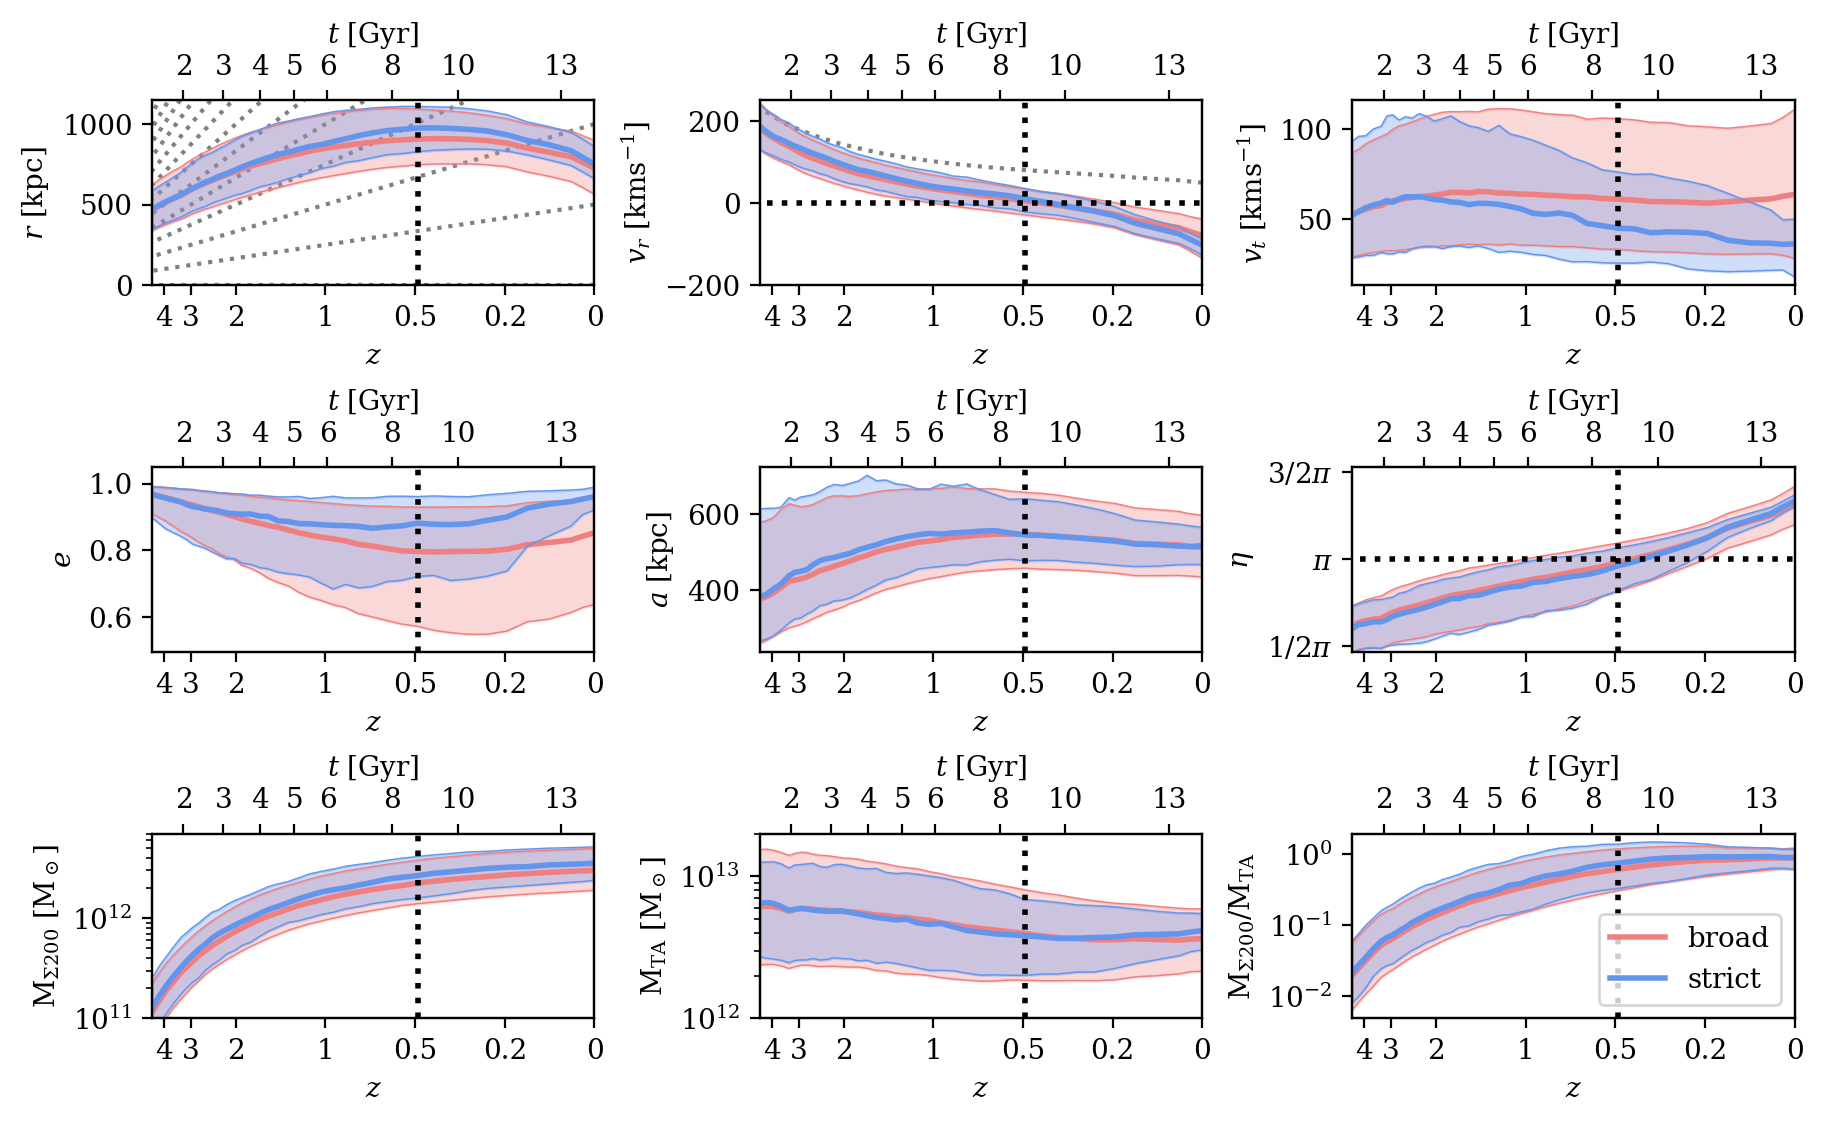

In [23]:
# plotting
        
fig, axes = plt.subplots(figsize=(9,5.5), ncols=3, nrows=3, dpi=200, constrained_layout = True)
norm = plt.Normalize(0,1)


for i, ax in enumerate(fig.axes):
    
    ax.fill_between(scale[fine_index], var_minus1_l[i], var_plus1_l[i], color='lightcoral', alpha=.3)
    ax.fill_between(scale[fine_index], var_minus1_s[i], var_plus1_s[i], color='cornflowerblue', alpha=.3)
    
    ax.plot(scale[fine_index], var_med_l[i], c='lightcoral', lw=2., ls='solid', zorder=2, label = 'broad')
    ax.plot(scale[fine_index], var_plus1_l[i], c='lightcoral', lw=.5, ls='solid', zorder=2)
    ax.plot(scale[fine_index], var_minus1_l[i], c='lightcoral', lw=.5, ls='solid', zorder=2)

    ax.plot(scale[fine_index], var_med_s[i], c='cornflowerblue', lw=2., ls='solid', zorder=2, label = 'strict')
    ax.plot(scale[fine_index], var_plus1_s[i], c='cornflowerblue', lw=.5, ls='solid', zorder=2)
    ax.plot(scale[fine_index], var_minus1_s[i], c='cornflowerblue', lw=.5, ls='solid', zorder=2)

# Format and label the axes

for i, ax in enumerate(fig.axes):
        
    ax.axvline(scale[10], ls='dotted', c='black', lw=2)

    ax.set_xticks(label_scales)
    ax.set_xticklabels(label_redshifts_str)
    
    ax.set_xlabel(r'$z$')

    ax2 = ax.twiny() # ax1 and ax2 share y-axis
    ax2.set_xlabel(r'$t\ \mathrm{[Gyr]}$')
    ax2.set_xticks(ageticks)
    ax2.set_xticklabels(['{:g}'.format(age) for age in ages.value])
    ax.set_xlim(min(scale[fine_index]),1)
    ax2.set_xlim(min(scale[fine_index]),1)

    
axes[0,1].plot([0,1],[0,0], ls='dotted', c='black', lw=2)

axes[0,0].set_ylim(bottom=0)
axes[2,0].set_ylim(bottom = 1e11, top=7e12)
axes[2,1].set_ylim(bottom = 1e12, top=2e13)

axes[0,0].set_ylabel(r'$r \ [\mathrm{kpc}]$')
axes[0,1].set_ylabel(r'$v_r \ [\mathrm{kms^{-1}}]$')
axes[0,2].set_ylabel(r'$v_t \ [\mathrm{kms^{-1}}]$')

axes[1,0].set_ylabel(r'$e$')
axes[1,1].set_ylabel(r'$a  \ [\mathrm{kpc}]$')
axes[1,2].set_ylabel(r'$\eta$')

axes[2,0].set_ylabel(r'$\mathrm{M_{\Sigma 200} \ [M_\odot]}$')
axes[2,1].set_ylabel(r'$\mathrm{M_{TA} \ [M_\odot]}$')
axes[2,2].set_ylabel(r'$\mathrm{M_{\Sigma 200} / M_{TA}}$')

axes[2,0].set_yscale('log')
axes[2,1].set_yscale('log')
axes[2,2].set_yscale('log')
axes[2,2].minorticks_off()


ages = np.array([13, 10, 8, 6, 5, 4, 3, 2, 1])*u.Gyr
ageticks = [1 / (1 + z_at_value(cosmo.age, age)) for age in ages]

# units of pi
axes[1,2].plot([0,1],[3.1415,3.1415], ls='dotted', c='black', lw=2)

axes[1,2].set_yticks(np.arange(0, 2*np.pi+0.01, np.pi/2))
#Change axis labels:
labels = ['$0$', r'$1/2 \pi$', r'$\pi$', r'$3/2\pi$', r'$2\pi$']
axes[1,2].set_yticklabels(labels)
axes[1,2].set_ylim(np.pi / 2 - .1, 3*np.pi / 2 + .1)

axes[0,2].autoscale_view(True,True,True)

# overplot expansion of the universe:
for i in range (50):
    axes[0,0].plot(scale, i*500*scale, c = 'grey', ls = 'dotted', lw=1.5, zorder=-1)
    
# for the hubble expansion speed, we use the median separation
    
Hubble_flow = cosmo.H(1/scale - 1).value # value is km/s / Mpc
axes[0,1].plot(scale[fine_index], Hubble_flow[fine_index] * r_med / 1000., c = 'grey', ls = 'dotted', lw=1.5, zorder=-1)

axes[0,1].set_ylim(-200,250)
axes[1,0].set_ylim(0.495,1.05)

axes[2,2].legend()

plt.savefig(plot_directory+'/average_evolution_dual.pdf')
    

### Plot values relative to z=0 _(not shown in paper)_

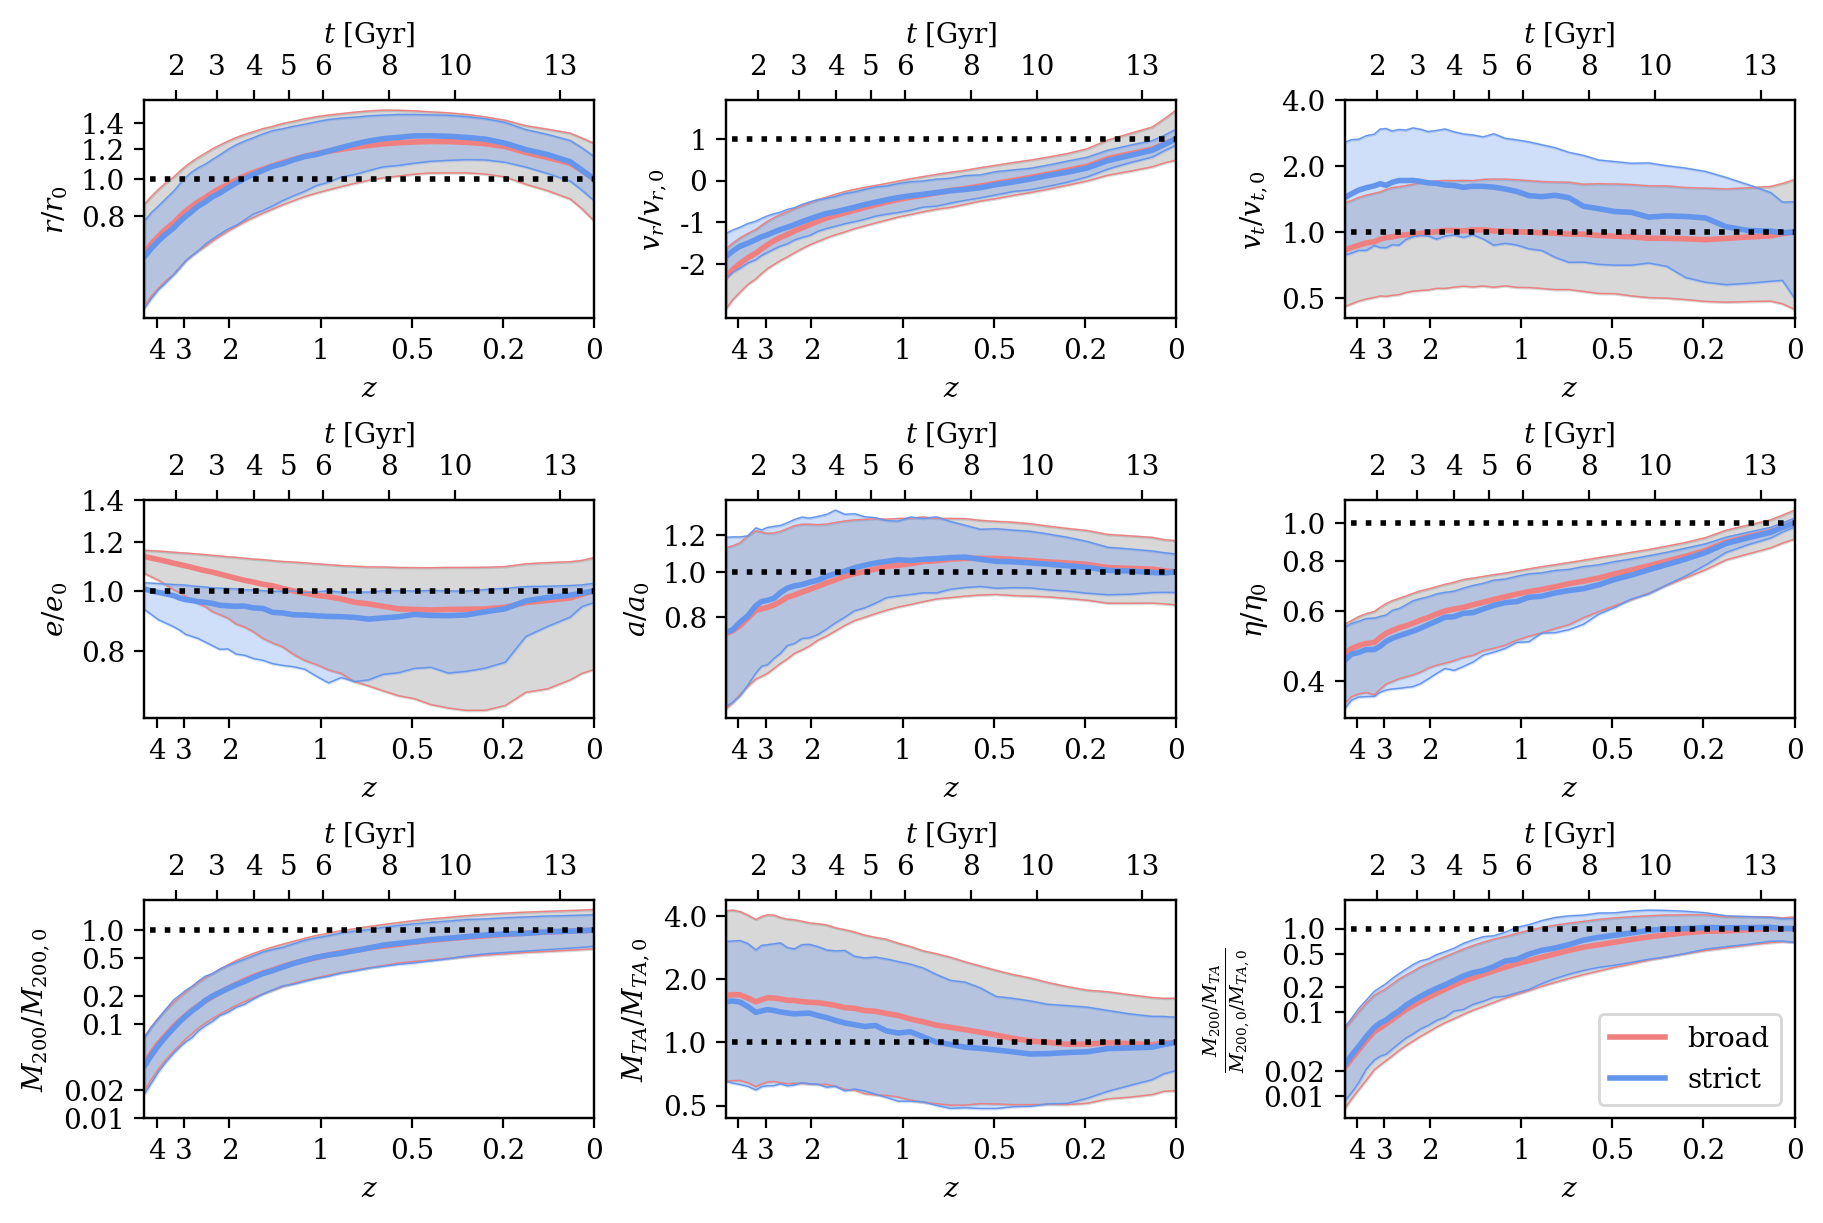

In [24]:
# plotting

fig, axes = plt.subplots(figsize=(9,6), ncols=3, nrows=3, dpi=200, constrained_layout = True)

for i, ax in enumerate(fig.axes):
    
    if i == 8:
        label_s = 'strict'
        label_l = 'broad'
    else:
        label_s = ''
        label_l = ''
        
    ax.fill_between(scale[fine_index], var_minus1_l[i] / var_med_l[i][0], var_plus1_l[i] / var_med_l[i][0], color='grey', alpha=.3)
    ax.fill_between(scale[fine_index], var_minus1_s[i] / var_med_s[i][0], var_plus1_s[i] / var_med_s[i][0], color='cornflowerblue', alpha=.3)    
    
    ax.plot(scale[fine_index], var_med_l[i] / var_med_l[i][0], c='lightcoral', lw=2., ls='solid', zorder=2, label = label_l)
    ax.plot(scale[fine_index], var_plus1_l[i] / var_med_l[i][0], c='lightcoral', lw=.5, ls='solid', zorder=2)
    ax.plot(scale[fine_index], var_minus1_l[i] / var_med_l[i][0], c='lightcoral', lw=.5, ls='solid', zorder=2)

    ax.plot(scale[fine_index], var_med_s[i] / var_med_s[i][0], c='cornflowerblue', lw=2., ls='solid', zorder=2, label = label_s)
    ax.plot(scale[fine_index], var_plus1_s[i] / var_med_s[i][0], c='cornflowerblue', lw=.5, ls='solid', zorder=2)
    ax.plot(scale[fine_index], var_minus1_s[i] / var_med_s[i][0], c='cornflowerblue', lw=.5, ls='solid', zorder=2)

    
# Format and label the axes

for i, ax in enumerate(fig.axes):
        
    ax.set_xticks(label_scales)
    ax.set_xticklabels(label_redshifts_str)
    
    ax.set_xlabel(r'$z$')
    ax.set_yscale('log')
    
    ax2 = ax.twiny() # ax1 and ax2 share y-axis
    ax2.set_xlabel(r'$t\ \mathrm{[Gyr]}$')
    ax2.set_xticks(ageticks)
    ax2.set_xticklabels(['{:g}'.format(age) for age in ages.value])
    ax.set_xlim(min(scale[fine_index]),1)
    ax2.set_xlim(min(scale[fine_index]),1)
    
    ax.plot([0,1],[1,1], ls='dotted', c='black', lw=2)
    
    ax.minorticks_off()


axes[0,1].set_yscale('linear')

axes[0,0].set_ylabel(r'$r / r_0$')
axes[0,1].set_ylabel(r'$v_r / v_{r,0}$')
axes[0,2].set_ylabel(r'$v_t / v_{t,0}$')

axes[1,0].set_ylabel(r'$e / e_0$')
axes[1,1].set_ylabel(r'$a / a_0$')
axes[1,2].set_ylabel(r'$\eta / \eta_0$')

axes[2,0].set_ylabel(r'$M_{200} / M_{200, 0} $')
axes[2,1].set_ylabel(r'$M_{TA} / M_{TA, 0}$')
axes[2,2].set_ylabel(r'$\frac{M_{200}/M_{TA}}{M_{200,0} / M_{TA,0}}$')

ages = np.array([13, 10, 8, 6, 5, 4, 3, 2, 1])*u.Gyr
ageticks = [1 / (1 + z_at_value(cosmo.age, age)) for age in ages]

axes[0,0].set_yticks([0.8,1.,1.2,1.4], [0.8,1.,1.2,1.4])
axes[0,1].set_yticks([-2,-1,0,1], [-2,-1,0,1])
axes[0,2].set_yticks([0.5,1.,2.,4.], [0.5,1.,2.,4.])

axes[1,0].set_yticks([0.8,1.,1.2,1.4], [0.8,1.,1.2,1.4])
axes[1,1].set_yticks([0.8,1.,1.2], [0.8,1.,1.2])
axes[1,2].set_yticks([0.4,0.6,0.8,1.], [0.4,0.6,0.8,1.])

axes[2,0].set_yticks([0.01,0.02, 0.1, 0.2, 0.5,1.], [0.01,0.02,0.1,0.2,0.5,1.])
axes[2,1].set_yticks([0.5,1.,2.,4.], [0.5,1.,2.,4.])
axes[2,2].set_yticks([0.01,0.02, 0.1,0.2, 0.5,1.], [0.01,0.02,0.1,0.2, 0.5,1.])


axes[2,2].legend()

plt.savefig(plot_directory+'/average_evolution_relative_dual.pdf')
    

### Plot correlations between mass estimators at different redshifts. (_Figure 4_) <a id='scatter'></a>  (back to [Contents](#Contents))

idx: 0 snap: 50 tree idx: 0
len MTA 4902
len MLG 4902
len MR 4902
MR: [12.79439326 12.63431079 12.72264048 ... 12.64317326 12.37042818
 12.29372359]
idx: 1 snap: 45 tree idx: 5
len MTA 4902
len MLG 4902
len MR 4902
MR: [12.79449422 12.66962278 12.74748612 ... 12.66804982 12.37997156
 12.31045341]
idx: 2 snap: 40 tree idx: 10
len MTA 4902
len MLG 4902
len MR 4902
MR: [12.80133838 12.68322457 12.76432905 ... 12.66243074 12.39694102
 12.32507751]
idx: 3 snap: 30 tree idx: 20
len MTA 4902
len MLG 4902
len MR 4902
MR: [12.76190554 12.7015286  12.78029977 ... 12.65743062 12.45712328
 12.31797825]
idx: 4 snap: 20 tree idx: 30
len MTA 4902
len MLG 4902
len MR 4902
MR: [12.72462121 12.68759373 12.77841819 ... 12.47539321 12.45580413
 12.30757183]
idx: 5 snap: 15 tree idx: 35
len MTA 4902
len MLG 4902
len MR 4902
MR: [12.80361797 12.72462121 12.73373412 ... 12.4965491  12.48845516
 12.2503757 ]
idx: 6 snap: 12 tree idx: 38
len MTA 4902
len MLG 4902
len MR 4902
MR: [12.80361797 12.77116453 12.701

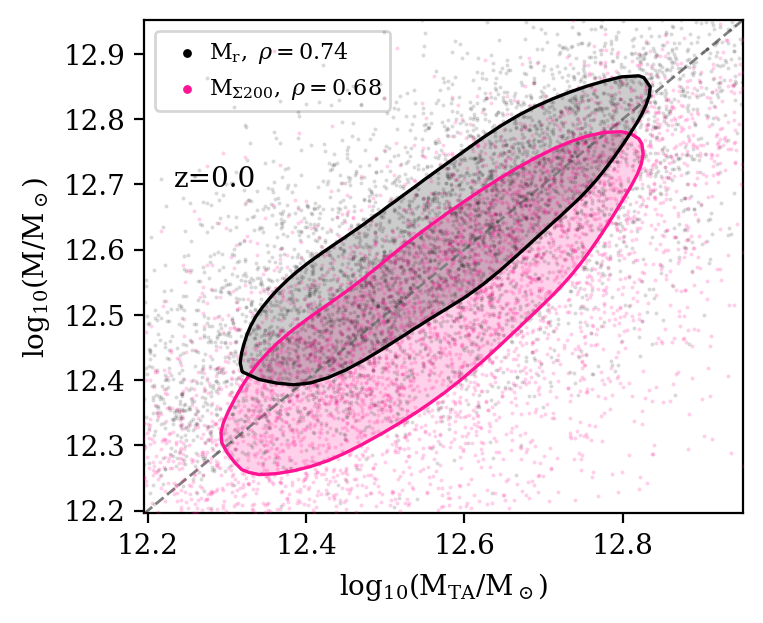

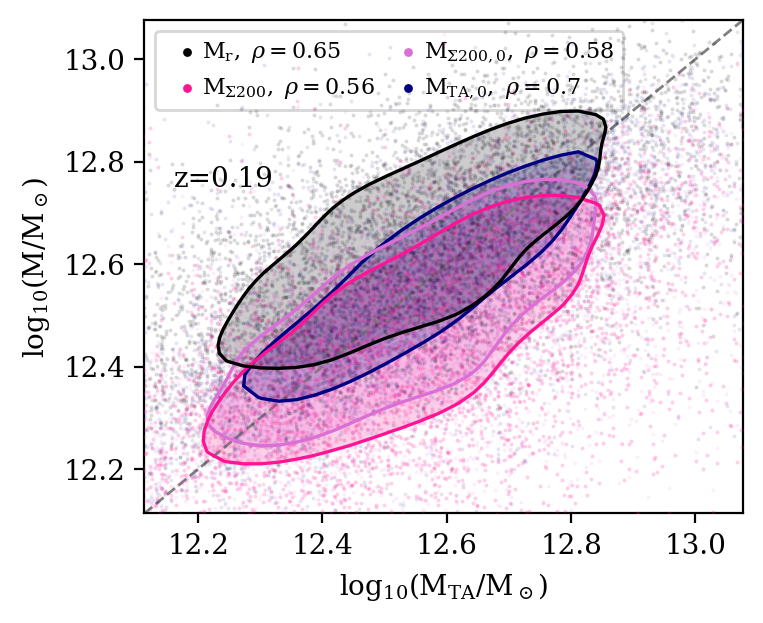

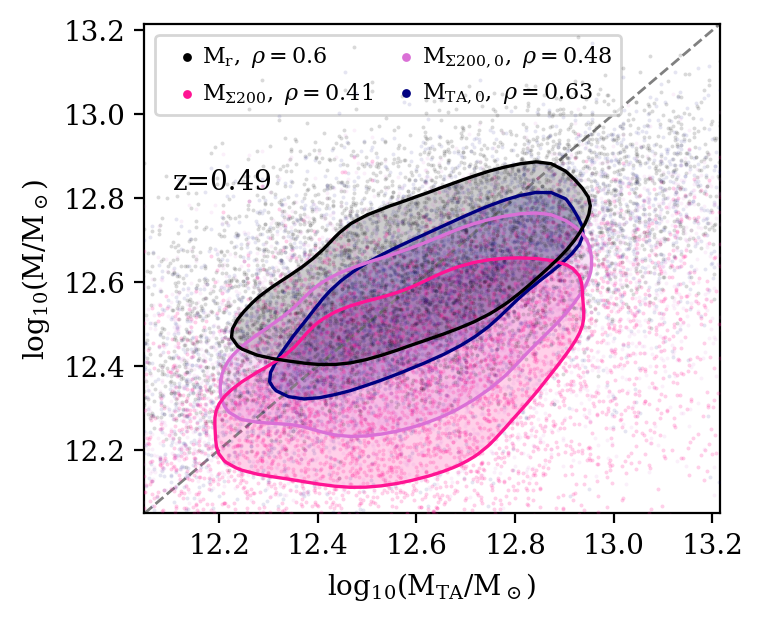

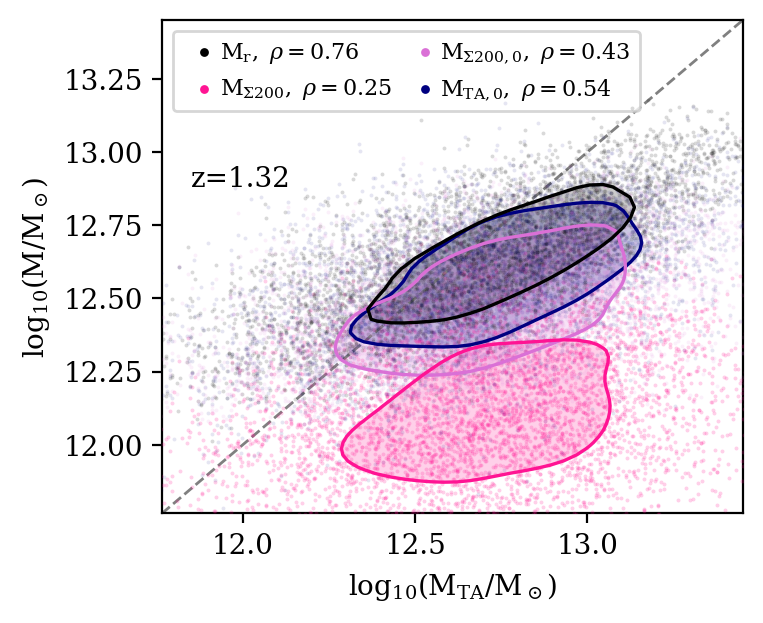

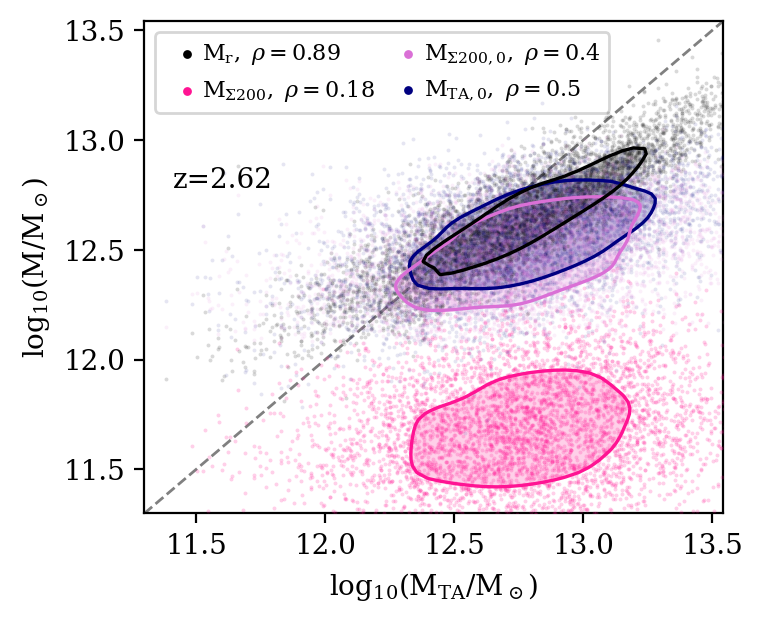

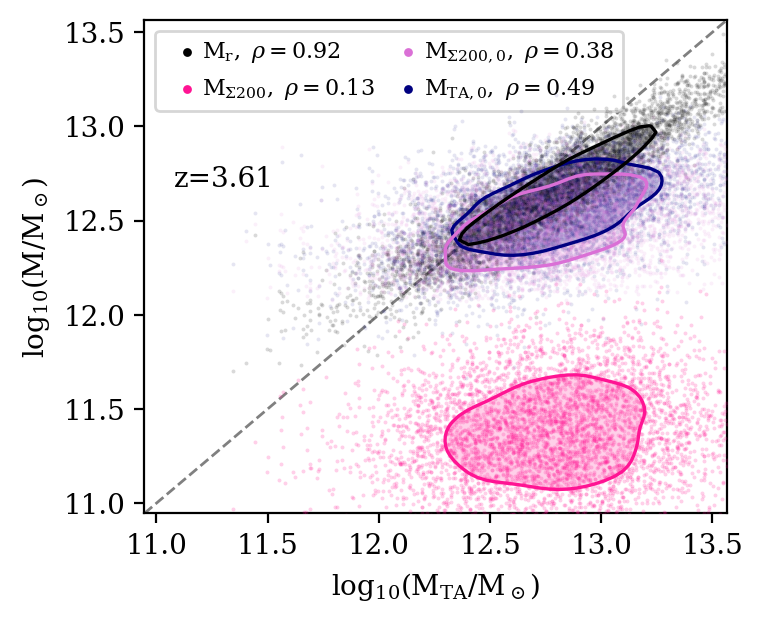

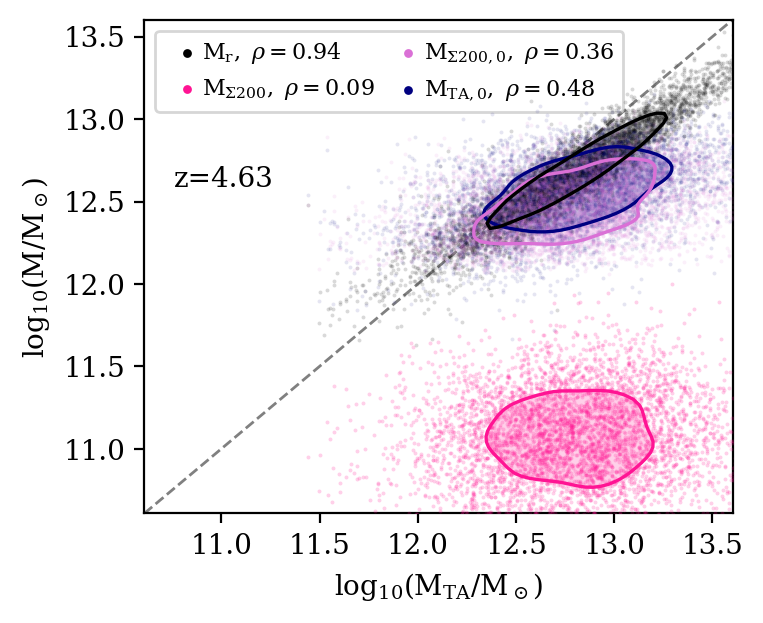

In [25]:
origin = 'lower'
levels = [0.6065,1] # this corresponds to the height of a 2D normal distribution at 1 sigma.

for idx, snap in enumerate(snapshots):
    
    print ("idx:", idx, "snap:", snap, "tree idx:", tree_index[idx])
    
    fig, ax = plt.subplots(figsize=(3.7,3.), ncols=1, nrows=1, dpi=200, constrained_layout = True)
   
    M_TA = np.log10(np.array([list_M_TA_l[i][tree_index[idx]] for i in range(N_LG_l)])) 
    print ("len MTA", len(M_TA))
    M_MW = np.array([list_M_MW_l[i][tree_index[idx]] for i in range(N_LG_l)]) # works
    M_M31 = np.array([list_M_M31_l[i][tree_index[idx]] for i in range(N_LG_l)]) # works
    M_LG = np.log10(M_MW + M_M31)
    print ("len MLG", len(M_LG))


    corr_M200 = np.corrcoef(M_TA, M_LG)
    
    M_MW = np.array([list_M_MW_l[i][0] for i in range(N_LG_l)]) # works
    M_M31 = np.array([list_M_M31_l[i][0] for i in range(N_LG_l)]) # works
    
    M_LG_z0 = np.log10(M_MW + M_M31)

    corr_M200_z0 = np.corrcoef(M_TA, M_LG_z0)
    
#    LG_spheremass_r[idx][mask_loose
    
    M_r = np.log10([LG_spheremass_r[idx][i][18] for i in mask_loose])
    
    print ("len MR", len(M_r))
    print ("MR:", M_r)

    corr_Mr = np.corrcoef(M_TA, M_r)
    
    M_TA_z0 =  np.log10(np.array([list_M_TA_l[i][0] for i in range(N_LG_l)])) # works

    corr_MTA_z0 = np.corrcoef(M_TA, M_TA_z0)
    
    ax.scatter(M_TA , M_LG , alpha = .2, c='deeppink', lw = 0., s=2, rasterized=True, zorder =20)
    ax.scatter(M_TA ,  M_r , alpha = .15, c='black', lw=0, s=2, rasterized=True, zorder =20)
    
    if idx > 0:
        ax.scatter(M_TA , M_TA_z0 , alpha = .1, c='navy', lw=0, s=2, rasterized=True, zorder =20)
        ax.scatter(M_TA , M_LG_z0 , alpha = .1, c='orchid', lw=0, s=2, rasterized=True, zorder =20)

   
    ax.set_xlabel(r'$\mathrm{log_{10}( M_{TA} / M_\odot)}$')
    ax.set_ylabel(r'$\mathrm{log_{10}( M / M_\odot)}$')

    ax.set_xlim(min(np.percentile(M_TA,6),np.percentile(M_LG,6), np.percentile(M_r,6)),
                max(np.percentile(M_TA,98),np.percentile(M_LG,98), np.percentile(M_r,98)))
    
    ax.set_ylim(min(np.percentile(M_TA,6),np.percentile(M_LG,6), np.percentile(M_r,6)),
                max(np.percentile(M_TA,98),np.percentile(M_LG,98), np.percentile(M_r,98)))
    
    ax.plot([0, 1], [0, 1], ls='dashed', color='grey', lw=1, transform=ax.transAxes)
    
    ax.text(0.05, 0.65, 'z='+str(np.round(1/scale[50-snap] -1,2)), ha='left', va='bottom', zorder=150, transform=ax.transAxes)
    
    # CONTOURS

    # M200
    x = M_TA
    y = M_LG
    
    k = gaussian_kde(np.vstack([x, y]), )
    
    xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))

    zi = (zi-zi.min())/(zi.max() - zi.min())
    zi =zi.reshape(xi.shape)

    CS = ax.contour(xi, yi, zi,levels = levels, colors=('deeppink'), linewidths=(1.2,), linestyles=('solid'), origin=origin, zorder =50)
    CSf = ax.contourf(xi, yi, zi,levels = levels, colors=('deeppink'), alpha=0.2, origin=origin)
    
    # MR
    x = M_TA
    y = M_r

    k = gaussian_kde(np.vstack([x, y]), )

    xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))

    zi = (zi-zi.min())/(zi.max() - zi.min())
    zi =zi.reshape(xi.shape)

    CS = ax.contour(xi, yi, zi,levels = levels, colors=('black'), linewidths=(1.2,), linestyles=('solid'), origin=origin, zorder =100)
    CSf = ax.contourf(xi, yi, zi,levels = levels, colors=('black'), alpha=0.2, origin=origin)
    
    if idx > 0:

       # M200, z0
        x = M_TA
        y = M_LG_z0

        k = gaussian_kde(np.vstack([x, y]), )

        xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
        zi = k(np.vstack([xi.flatten(), yi.flatten()]))

        zi = (zi-zi.min())/(zi.max() - zi.min())
        zi =zi.reshape(xi.shape)

        CS = ax.contour(xi, yi, zi,levels = levels, colors=('orchid'), linewidths=(1.2,), linestyles=('solid'), origin=origin, zorder =40)
        CSf = ax.contourf(xi, yi, zi,levels = levels, colors=('orchid'), alpha=0.2, origin=origin)

     # MTA, z0
        x = M_TA
        y = M_TA_z0

        k = gaussian_kde(np.vstack([x, y]), )

        xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
        zi = k(np.vstack([xi.flatten(), yi.flatten()]))

        zi = (zi-zi.min())/(zi.max() - zi.min())
        zi =zi.reshape(xi.shape)

        CS = ax.contour(xi, yi, zi,levels = levels, colors=('navy'), linewidths=(1.2,), linestyles=('solid'), origin=origin, zorder =30)
        CSf = ax.contourf(xi, yi, zi,levels = levels, colors=('navy'), alpha=0.2, origin=origin)
    
    
    # legend
    ax.scatter([],[], alpha = 1., c='black', lw=0, s=10,
                 label=r'$\mathrm{M_{r}}, \ \rho=$'+str(np.round(corr_Mr[1,0], 2)))
    
    ax.scatter([],[], alpha = 1., c='deeppink', lw = 0., s=10,
                 label=r'$\mathrm{M_{\Sigma 200}}, \ \rho=$'+str(np.round(corr_M200[1,0], 2)))
    
    if idx > 0:
        ax.scatter([],[], alpha = 1., c='orchid', lw = 0., s=10, zorder =20,
                 label=r'$\mathrm{M_{\Sigma 200,0}}, \ \rho=$'+str(np.round(corr_M200_z0[1,0], 2)))
        ax.scatter([],[], alpha = 1., c='navy', lw = 0., s=10, zorder =20,
                 label=r'$\mathrm{M_{TA,0}}, \ \rho=$'+str(np.round(corr_MTA_z0[1,0], 2)))
    
        ax.legend(loc='upper left', fontsize=8., ncol=2, columnspacing=0.5, handletextpad=-0.3)

    else:
        
         ax.legend(loc='upper left', fontsize=8., handletextpad=0.0)
            
    plt.savefig(plot_directory+'/MTA_M_scatter_snap_broad_'+str(snap)+'.pdf')

### End of the notebook. (back to [Contents](#Contents))